## Latent Dirichlet Allocation (LDA) Model

In [1]:
from lda import LDA

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = sio.loadmat('kos_doc_data.mat')

A = data['A']
B = data['B']
V = data['V']

M = np.max([np.max(A[:, 1]), np.max(B[:, 1])])   # total no of vocabs
M

6906

In [2]:
V

array([[array(['aarp'], dtype='<U4')],
       [array(['abandon'], dtype='<U7')],
       [array(['abandoned'], dtype='<U9')],
       ...,
       [array(['zogbys'], dtype='<U6')],
       [array(['zone'], dtype='<U4')],
       [array(['zones'], dtype='<U5')]], dtype=object)

### Plot topic posteriors for K = 20 as a function of the number of Gibbs sweeps, up to 50 sweeps.

In [3]:
K = 20  # number of clusters
alpha = .1  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words

# perplexity, swk = LDA(A, B, K, alpha, gamma)

In [4]:
# data = sio.loadmat('results/e/theta_doc1000_help.mat')
data = sio.loadmat('results/e/theta_doc1000(re).mat')
theta = data['theta']
theta.shape

(20, 51)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


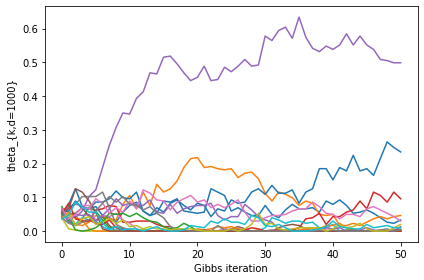

In [5]:
num_iters = theta.shape[1] - 1

x_pos = np.linspace(0, num_iters, num_iters+1)
print(x_pos)

for k in range(theta.shape[0]):
    plt.plot(x_pos, theta[k, :])

plt.xlabel('Gibbs iteration')
plt.ylabel('theta_{k,d=1000}')
# plt.title('Evolution of topic proportions theta_d for document ID=1000 (K=20)')

plt.tight_layout()
plt.savefig('results/e/e_topic_posteriors_doc1000.png')

In [6]:
np.log2(np.e)

1.4426950408889634

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


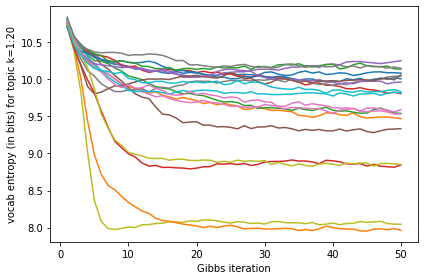

In [7]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data = sio.loadmat('results/e/entropy.mat')
# data = sio.loadmat('results/e/word_entropy_help.mat')
data = sio.loadmat('results/e/word_entropy.mat')
entropy = data['word_entropy']
# print(entropy[0,:])
# print(entropy)

entropy = entropy* np.log2(np.e)

num_iters = entropy.shape[1]

x_pos = np.linspace(1, num_iters, num_iters)
print(x_pos)

for k in range(entropy.shape[0]):
    plt.plot(x_pos, entropy[k, :])

plt.xlabel('Gibbs iteration')
plt.ylabel('vocab entropy (in bits) for topic k=1:20')

plt.tight_layout()
plt.savefig('results/e/e_vocab_entropy.png')

In [8]:
entropy.shape

(20, 50)

Results from MATLAB: Beta (top 20 words x 20 topics)

In [9]:
# republicans    bush           house          bush           bush           senate         party          herseth        november       iraq           delay          november       war            bush           bush           general        percent        media          dean           campaign       
# president      president      candidates     administration policy         republican     democratic     party          voting         war            court          poll           people         kerry          jobs           news           state          time           edwards        million        
# marriage       administration money          intelligence   years          race           republican     democrats      republicans    iraqi          committee      house          women          poll           john           media          poll           blog           kerry          election       
# democrats      tax            district       house          bushs          democrats      nader          miller         kerry          military       law            polls          iraq           general        campaign       kerry          vote           news           primary        money          
# gay            bushs          elections      white          service        house          voters         democratic     account        american       state          electoral      abu            voters         news           people         carson         people         democratic     political      
# bush           cheney         race           president      administration elections      election       republican     house          soldiers       texas          senate         important      polls          kerry          gotv           republican     bloggers       clark          democratic     
# conservative   billion        campaign       officials      people         gop            ballot         south          governor       troops         house          republicans    america        percent        sunday         local          coburn         ive            iowa           democrats      
# bill           house          knowles        report         guard          democratic     general        convention     electoral      saddam         investigation  governor       military       president      economy        john           votes          read           gephardt       media          
# political      year           races          commission     health         seat           voter          gop            senate         forces         federal        account        white          states         economic       line           senate         political      poll           ads            
# vote           federal        dkos           bin            national       state          states         house          vote           baghdad        documents      turnout        men            polling        growth         oct            race           internet       lieberman      republicans    
# rights         states         donors         cia            blades         republicans    campaign       people         poll           killed         ethics         ground         public         bushs          clinton        kerrys         voters         ill            candidates     presidential   
# republican     war            campaigns      information    foreign        democrat       democrats      elections      polls          government     office         parecommend    president      results        job            times          oklahoma       blogs          jan            public         
# issue          white          candidate      iraq           meteor         senator        gop            issues         election       iraqis         republican     contact        draft          vote           general        tonight        candidate      convention     results        bush           
# party          iraq           dozen          official       military       rep            national       diedrich       bush           security       republicans    duderino       ghraib         numbers        number         sinclair       ohio           community      kucinich       hard           
# time           budget         win            weapons        government     illinois       state          tom            voter          general        judge          trouble        american       debate         george         early          numbers        long           numbers        people         
# congress       deficit        raised         attacks        americans      bunning        republicans    harris         general        officials      criminal       exit           country        election       sun            republicans    states         press          endorsement    time           
# reagan         million        running        laden          issue          party          registration   country        sunzoo         country        supreme        primary        years          lead           chairman       time           lead           coverage       state          candidate      
# amendment      government     time           time           air            district       florida        mccain         war            attacks        officials      bush           black          race           numbers        live           liberal        piece          deans          politics       
# family         cuts           senate         rice           energy         seats          vote           dakota         experience     army           abuse          general        bush           john           adviser        lets           governor       politics       candidate      message        
# conservatives  record         support        qaeda          found          candidate      county         vote           nov            attack         legal          vote           general        kerrys         democratic     papers         oct            book           polls          race           

In [10]:
# percent        bush           senate         bush           people         news           general        delay          iraq           bush           dkos           november       war            people         party          house          house          dean           district       bush           
# bush           administration republican     million        time           fox            poll           court          war            kerry          campaign       house          iraq           media          campaign       administration senate         kerry          race           president      
# poll           white          convention     tax            labor          sunday         blades         law            iraqi          president      candidates     poll           military       election       republicans    white          republican     edwards        candidate      war            
# voters         commission     edwards        jobs           media          john           meteor         marriage       government     bushs          bunning        electoral      soldiers       blog           democrats      information    democrats      primary        republican     cheney         
# kerry          public         kerry          health         party          media          media          rights         officials      general        dozen          account        general        community      democratic     officials      democratic     clark          elections      people         
# general        attacks        candidate      billion        local          report         early          state          american       john           donors         governor       american       oct            political      investigation  elections      democratic     state          iraq           
# vote           terrorist      democratic     year           campaign       campaign       ill            gay            administration kerrys         senate         senate         iraqi          ive            ads            documents      race           poll           carson         administration 
# states         september      senator        economic       press          times          time           bill           united         george         jun            republicans    troops         specter        election       report         gop            iowa           senate         policy         
# election       intelligence   john           economy        dnc            clinton        ratings        republicans    troops         iraq           campaigns      polls          army           gotv           conservative   national       seat           gephardt       campaign       bushs          
# nader          terrorism      campaign       administration message        cnn            wont           years          country        campaign       elections      vote           dead           news           national       records        races          lieberman      money          united         
# state          powell         knowles        spending       working        sun            bush           amendment      states         war            jim            kerry          killed         hard           candidates     bush           state          numbers        election       years          
# polls          american       democrats      budget         union          national       film           texas          security       news           mongiardo      voting         fallujah       night          media          committee      republicans    polls          coburn         american       
# florida        rice           party          federal        issue          abc            zogby          issue          international  debate         debate         bush           baghdad        time           republican     time           million        results        win            country        
# republican     center         president      care           man            bill           america        committee      attacks        media          time           contact        forces         blogs          money          cia            rep            jan            house          states         
# ohio           richard        miller         government     politics       shows          michael        ethics         occupation     issue          nancy          general        service        tom            liberal        intelligence   democrat       state          oklahoma       bin            
# party          security       governor       cuts           email          cbs            moore          energy         iraqis         aug            ill            sunzoo         guard          schaller       internet       official       money          candidates     percent        foreign        
# ballot         attack         state          deficit        unions         television     air            supreme        rumsfeld       voters         murphy         voter          people         toomey         advertising    office         herseth        kucinich       illinois       weapons        
# polling        president      mccain         job            lot            adviser        love           federal        forces         sep            matsunaka      election       force          lets           times          press          south          deans          won            saddam         
# results        heard          presidential   cut            put            sens           movie          majority       political      oct            farmer         war            americans      sinclair       groups         republican     seats          sharpton       incumbent      america        
# voter          apr            sen            percent        years          chairman       tom            vote           plan           note           fundraising    experience     saddam         sort           interest       evidence       poll           endorsement    republicans    nations        

In [11]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

top_words = sio.loadmat('MATLAB/top_words(github).mat')
top_words = top_words['top_words'].T    # Change row to correspond to each topic k rather than each vocab i.

top_words_list = []
for topic_words in top_words:
    top_words_list.append([name[0] for name in topic_words])

top_words_list

[['percent',
  'bush',
  'poll',
  'voters',
  'kerry',
  'general',
  'vote',
  'states',
  'election',
  'nader',
  'state',
  'polls',
  'florida',
  'republican',
  'ohio',
  'party',
  'ballot',
  'polling',
  'results',
  'voter'],
 ['bush',
  'administration',
  'white',
  'commission',
  'public',
  'attacks',
  'terrorist',
  'september',
  'intelligence',
  'terrorism',
  'powell',
  'american',
  'rice',
  'center',
  'richard',
  'security',
  'attack',
  'president',
  'heard',
  'apr'],
 ['senate',
  'republican',
  'convention',
  'edwards',
  'kerry',
  'candidate',
  'democratic',
  'senator',
  'john',
  'campaign',
  'knowles',
  'democrats',
  'party',
  'president',
  'miller',
  'governor',
  'state',
  'mccain',
  'presidential',
  'sen'],
 ['bush',
  'million',
  'tax',
  'jobs',
  'health',
  'billion',
  'year',
  'economic',
  'economy',
  'administration',
  'spending',
  'budget',
  'federal',
  'care',
  'government',
  'cuts',
  'deficit',
  'job',
  'cut